In [1]:
import pandas as pd
import math
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

# Pedidos

In [3]:
pedidos = pd.read_csv(f"./store/pedidos.csv", header=0, parse_dates=True)

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

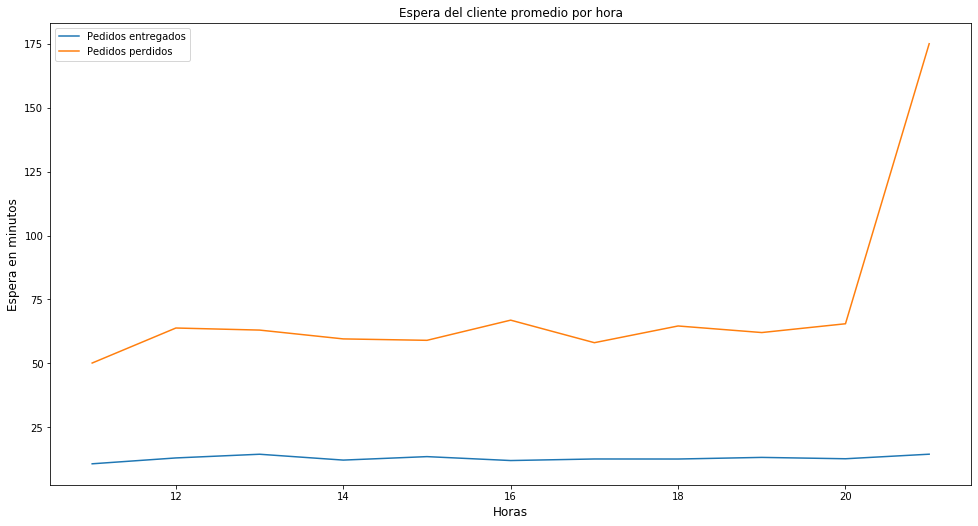

In [6]:
formato = '%Y-%m-%d %H:%M:%S'
pedidos_entregados = pedidos[pedidos.entregado]
pedidos_entregados["hora_toma"] = pedidos_entregados["hora_toma"].map(lambda x: datetime.strptime(x, formato))
pedidos_entregados["hora_entrega"] = pedidos_entregados["hora_entrega"].map(lambda x: datetime.strptime(x, formato))
pedidos_entregados["espera_cliente"] = pedidos_entregados["hora_entrega"] - pedidos_entregados["hora_toma"]
pedidos_entregados["espera_cliente"] = pedidos_entregados["espera_cliente"].map(lambda x: math.trunc(x.seconds / 60))
pedidos_entregados["hora"] = pedidos_entregados["hora_toma"].map(lambda x: x.time().hour)


pedidos_perdidos = pedidos[pedidos.entregado == False]
pedidos_perdidos["hora_toma"] = pedidos_perdidos["hora_toma"].map(lambda x: datetime.strptime(x, formato))
pedidos_perdidos["hora_entrega"] = pedidos_perdidos["hora_entrega"].map(lambda x: datetime.strptime(x, formato))
pedidos_perdidos["espera_cliente"] = pedidos_perdidos["hora_entrega"] - pedidos_perdidos["hora_toma"]
pedidos_perdidos["espera_cliente"] = pedidos_perdidos["espera_cliente"].map(lambda x: math.trunc(x.seconds / 60))
pedidos_perdidos["hora"] = pedidos_perdidos["hora_toma"].map(lambda x: x.time().hour)

fig, ax = plt.subplots()
fig.set_size_inches(16.5, 8.5)

ax.plot(pedidos_entregados[["hora", "espera_cliente"]].groupby("hora").mean(), label = "Pedidos entregados")
ax.plot(pedidos_perdidos[["hora", "espera_cliente"]].groupby("hora").mean(), label = "Pedidos perdidos")
ax.set_xlabel("Horas", fontsize=12)
ax.set_ylabel("Espera", fontsize=12)

plt.xlabel('Horas del dia')
plt.ylabel('Espera en minutos')
plt.title('Espera del cliente promedio por hora')
plt.legend()
plt.show()

# Desperdicios

In [7]:
desperdicios = pd.read_csv('./tests/store/desperdicios.csv')

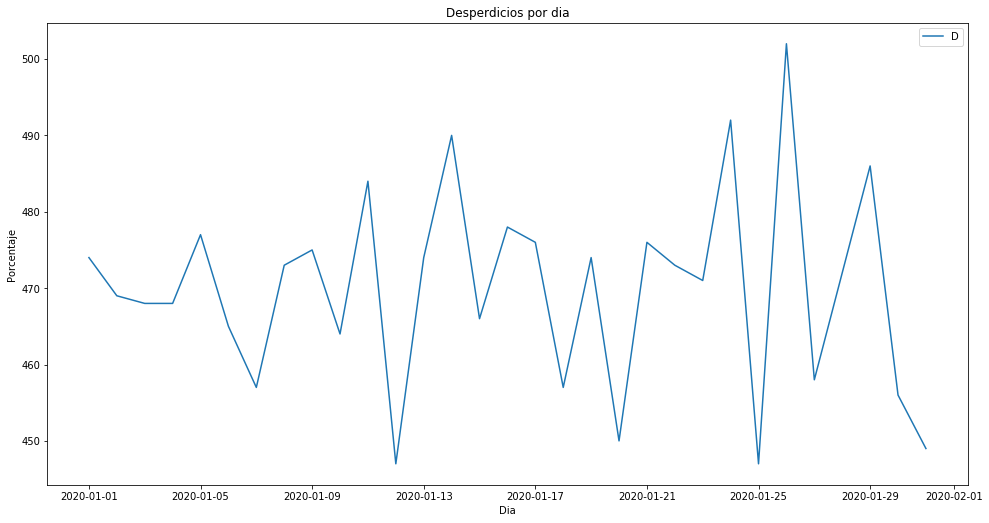

In [12]:
desperdicios["time"] = desperdicios["hora"].map(lambda x: (datetime.strptime(x, formato)).date())
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 8.5)

ax.plot(desperdicios[["id", "time"]].groupby('time').count())


plt.xlabel('Dia')
plt.ylabel('Porcentaje')
plt.title('Desperdicios por dia')
plt.legend("Desperdicios")
plt.show()

# Pedidos por tipo de pizza

## Pedidos entregados

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f17ca408a90>],
      dtype=object)

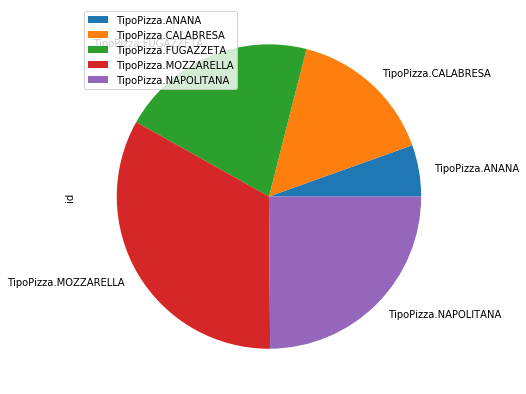

In [31]:
pedidos_entregados[['id', 'tipo_pizza']].groupby('tipo_pizza').count().plot.pie(subplots=True, figsize=(7,7))

## Pedidos perdidos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f17c5778990>],
      dtype=object)

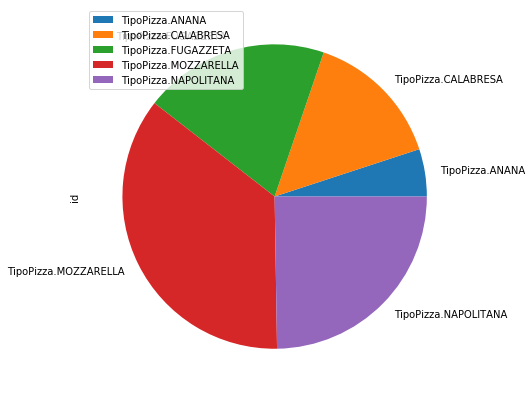

In [32]:
pedidos_perdidos[['id', 'tipo_pizza']].groupby('tipo_pizza').count().plot.pie(subplots=True, figsize=(7,7))